In [1]:
import os
import pydicom
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

rootpath = '/media/share/data/thyroid/'
cancerpath = os.path.join(rootpath, 'thyroid_cancer')
healthypath = os.path.join(rootpath, 'thyroid_healthy')

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


InvalidDicomError: File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.

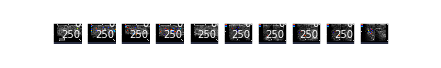

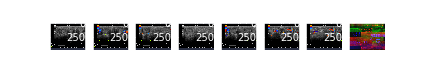

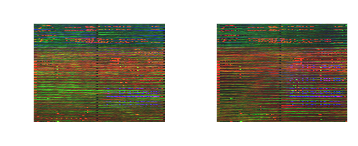

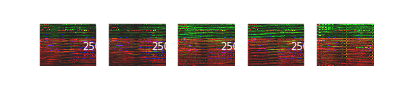

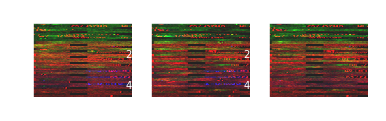

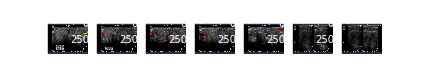

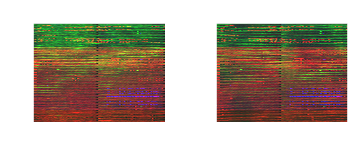

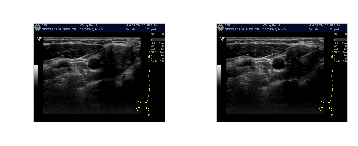

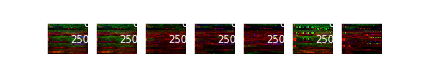

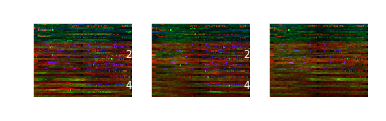

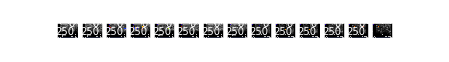

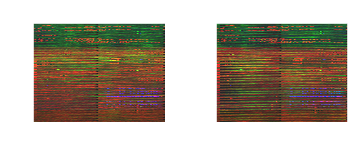

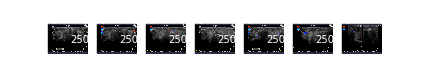

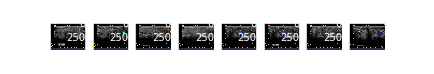

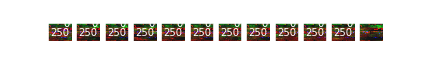

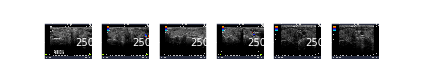

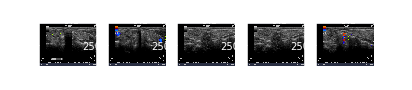

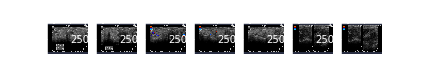

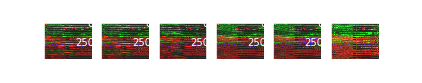

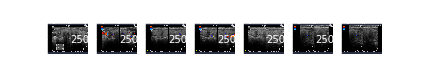

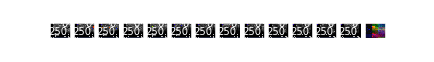

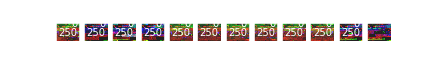

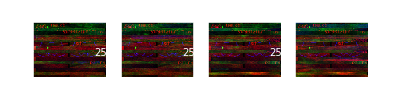

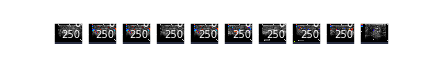

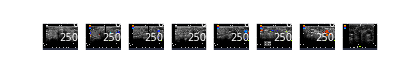

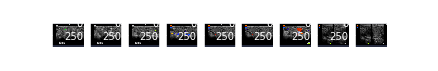

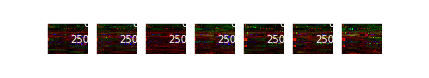

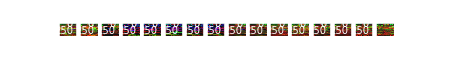

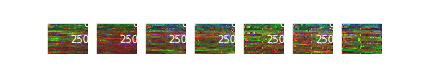

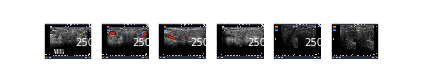

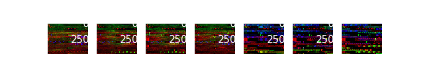

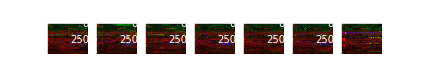

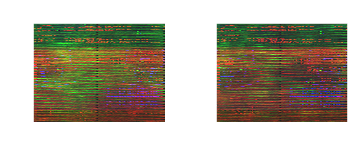

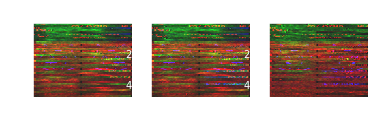

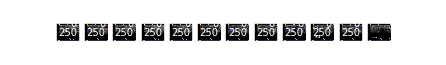

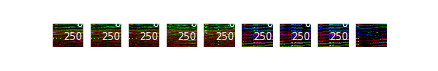

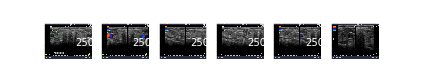

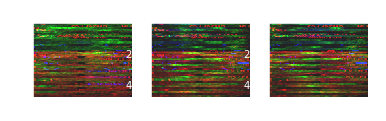

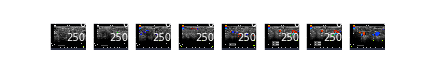

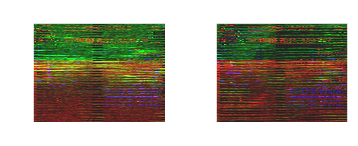

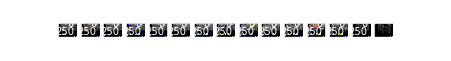

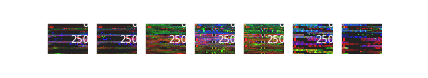

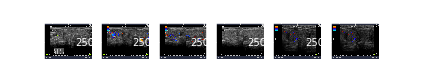

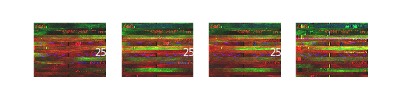

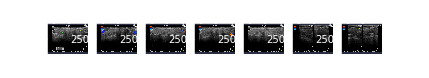

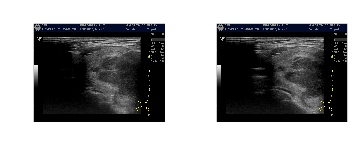

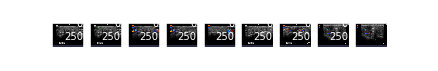

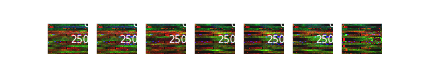

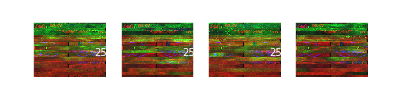

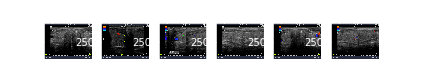

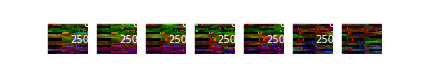

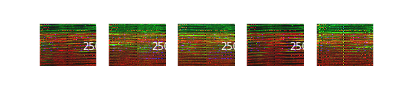

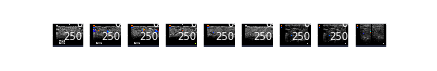

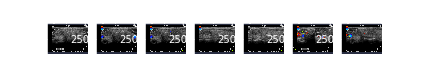

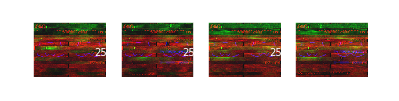

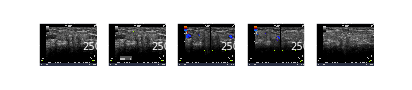

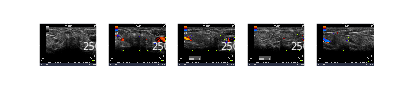

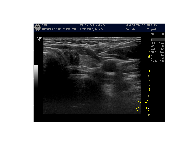

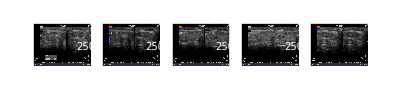

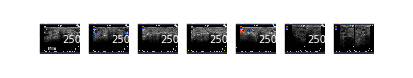

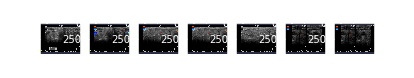

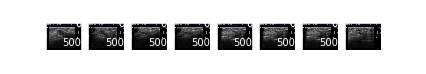

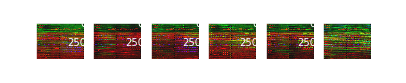

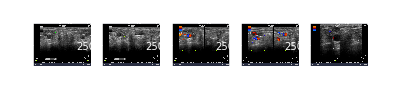

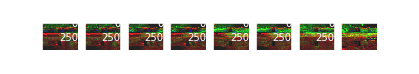

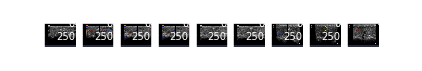

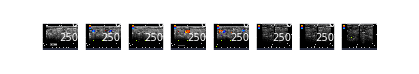

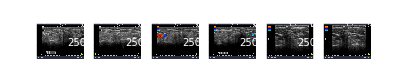

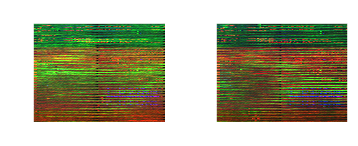

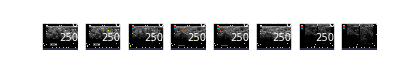

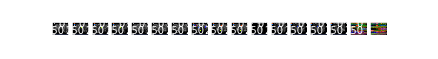

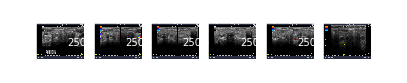

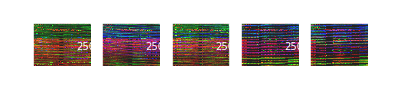

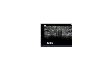

In [2]:
subidx = os.listdir(cancerpath)

for subj in subidx:
    midpath = os.path.join(cancerpath, subj)
    dcmidx = os.listdir(midpath)
    pic = 1
    plt.figure()
    for idx in dcmidx:
        dcm = pydicom.dcmread(os.path.join(midpath, idx))
        # check PlanarConfiguration: 0, 1, others
#         if dcm.PlanarConfiguration
#         if len(dcm.pixel_array.shape) > 3:
#             for kpop in dcm.pixel_array:
#                 img = kpop
#                 plt.subplot(3, len(dcmidx), pic)
#                 pic += 1
#                 plt.title(subj)
#                 plt.imshow(img)
#         else:
#             if 
        img = dcm.pixel_array
        plt.subplot(2, len(dcmidx), pic)
        pic += 1
        plt.title(subj)
        plt.imshow(img)

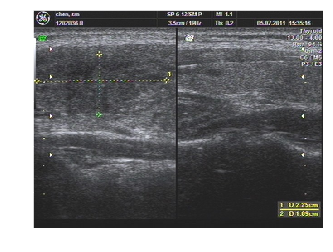

In [2]:
path00 = os.path.join(cancerpath, '12020368_A865283')
file00 = os.listdir(path00)
dcm = pydicom.dcmread(os.path.join(path00, file00[0]))
img = dcm.pixel_array
img = np.transpose(dcm.pixel_array, (2, 0, 1)).reshape(dcm.Rows, dcm.Columns, dcm.SamplesPerPixel)
plt.imshow(img)

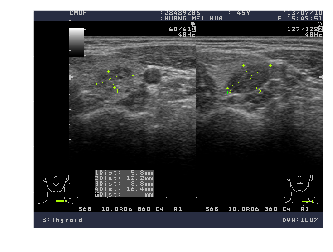

In [5]:
path00 = os.path.join(cancerpath, '28489286_A878766')
file00 = os.listdir(path00)
dcm = pydicom.dcmread(os.path.join(path00, file00[2]))
img = dcm.pixel_array
plt.imshow(img)

In [3]:
def img_preproc(img):
    
    from skimage.color import rgb2gray
    from skimage.filters import threshold_otsu
    from skimage.morphology import closing, square
    from skimage.measure import label, regionprops
    from skimage.segmentation import clear_border
    from scipy.ndimage.morphology import binary_fill_holes
    
    im = rgb2gray(img)
    thresh = threshold_otsu(im)
    bw = closing(im > thresh, square(3))
    cleared = clear_border(bw)
    
    # mask
    step1 = im * ~cleared
    step2 = threshold_otsu(step1)
    step3 = closing(step1 > step2, square(3))
    step4 = binary_fill_holes(step3)
    
    # search largest area
    label_img = label(step4)

    for region in regionprops(label_img):
        # take regions with large enough areas
        if region.area >= 160*300:
            minr, minc, maxr, maxc = region.bbox
            
    crop_img = img[minr+32:maxr, minc:maxc]
    
    return crop_img

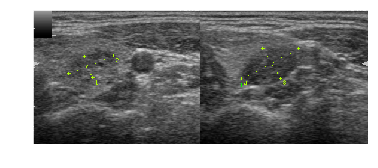

In [6]:
plt.imshow(img_preproc(img))

In [5]:
# Show some sample images
fig = plt.figure(figsize=(15,15))
for i,n in enumerate(sample(train_imgs, 25)):
    ax = fig.add_subplot(5,5,i+1)
    ax.imshow(n)

NameError: name 'regionprops' is not defined